## CorticalLabs Bulk Run with Method 1

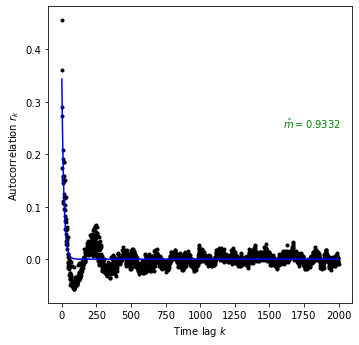

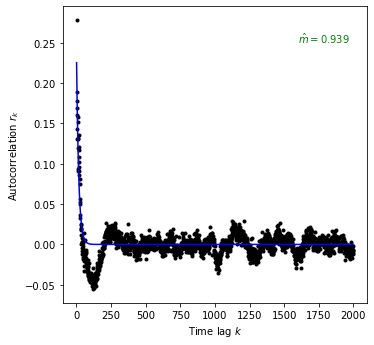

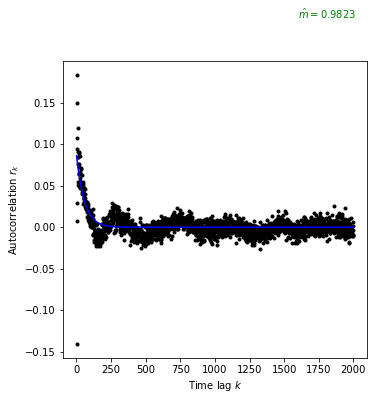

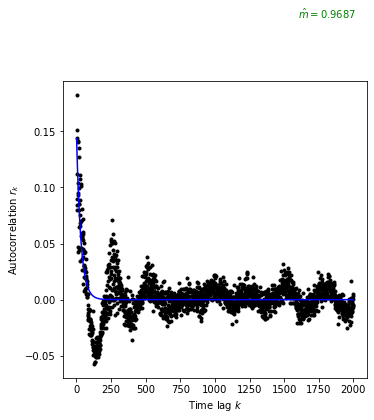

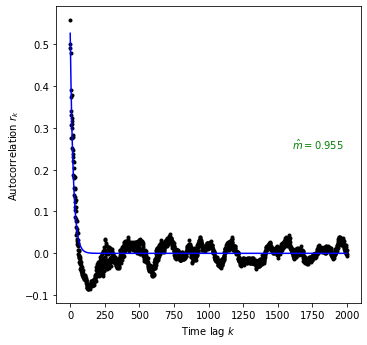

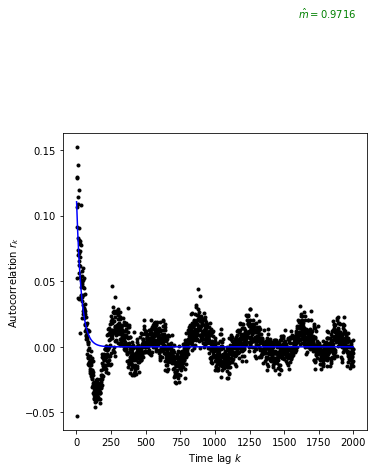

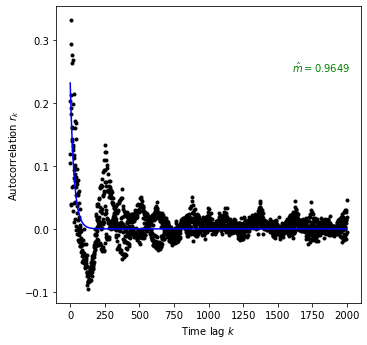

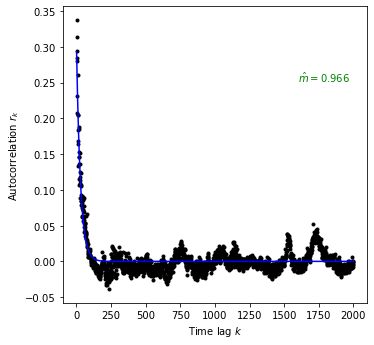

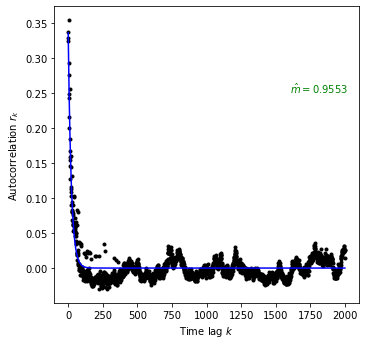

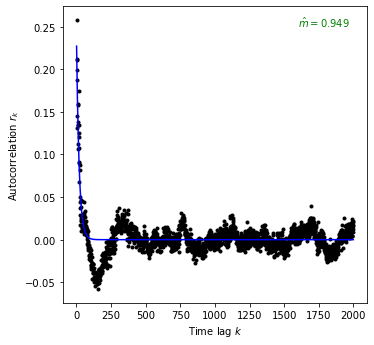

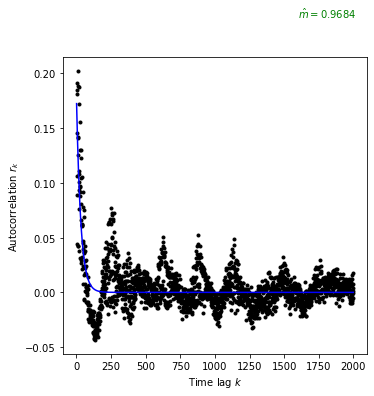

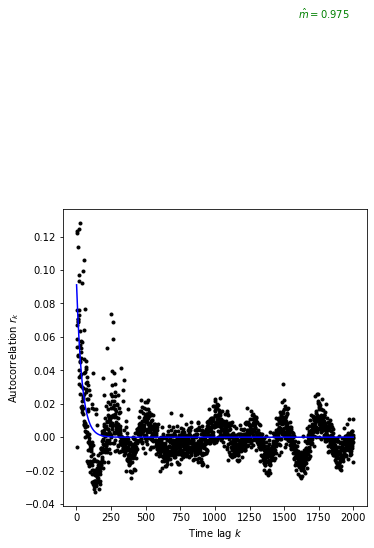

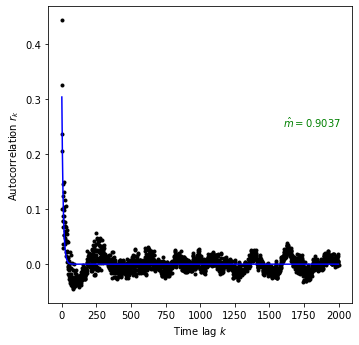

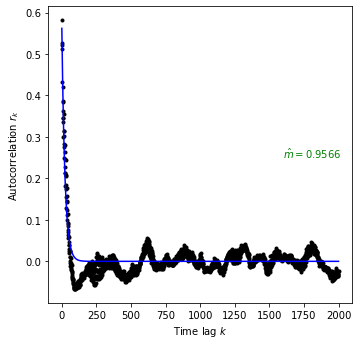

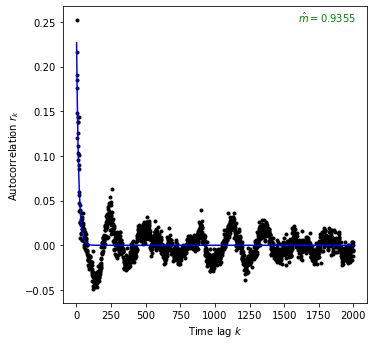

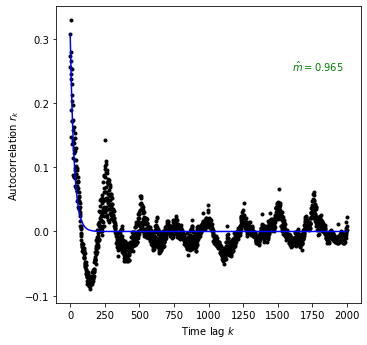

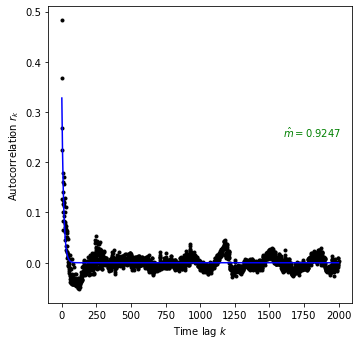

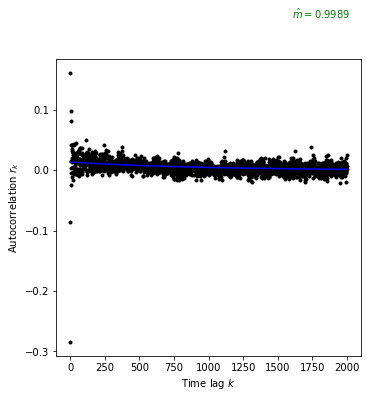

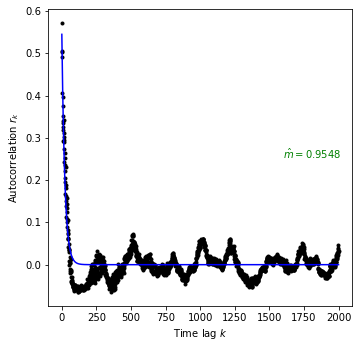

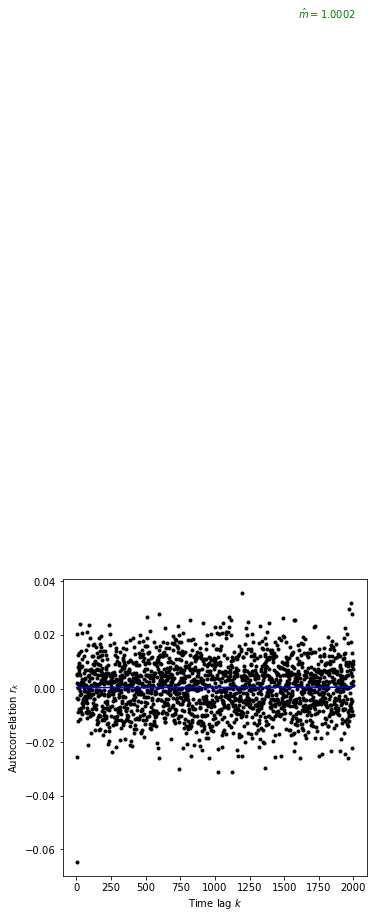

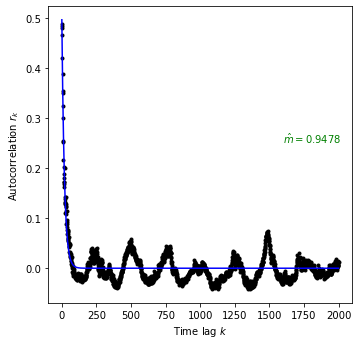

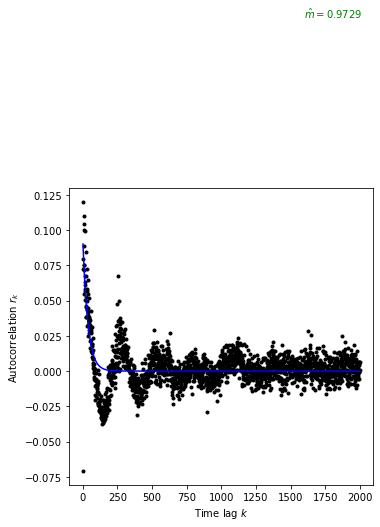

/opt/conda/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
/opt/conda/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/opt/conda/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


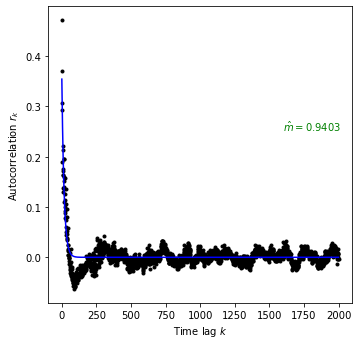

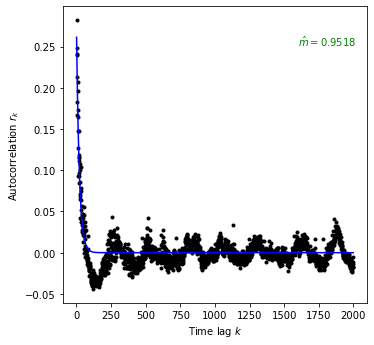

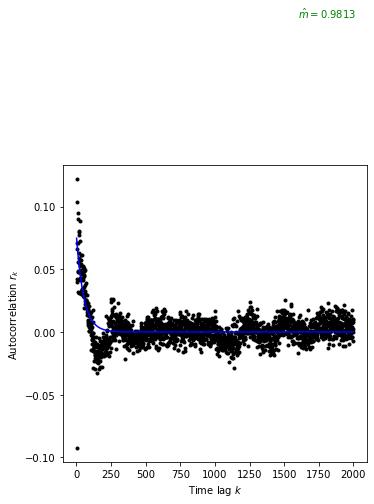

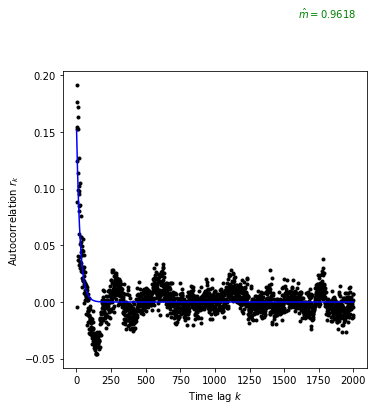

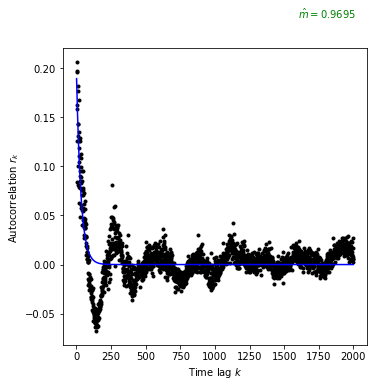

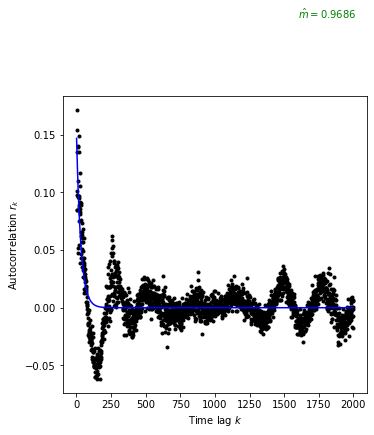

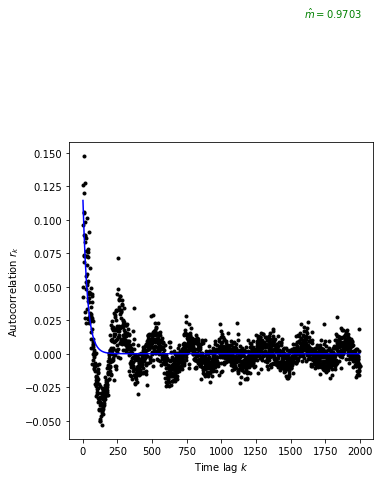

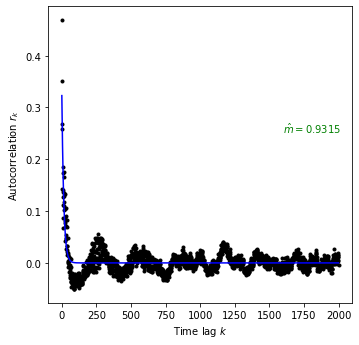

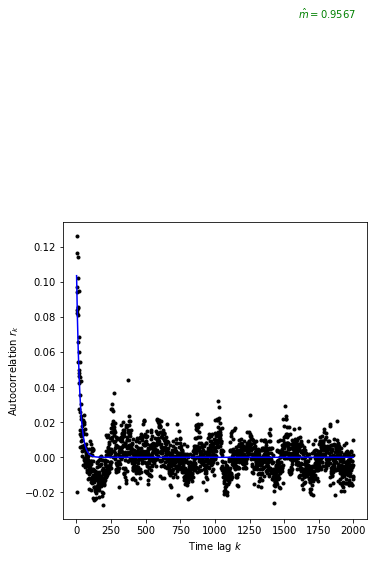

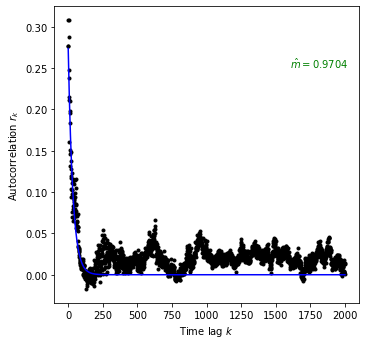

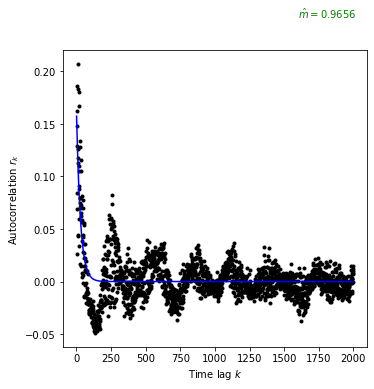

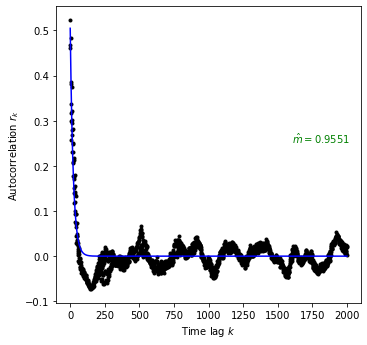

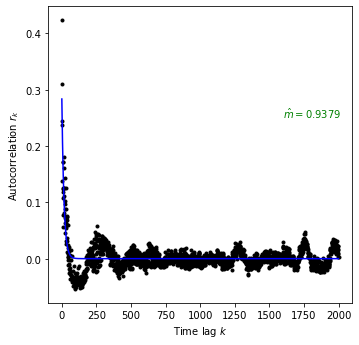

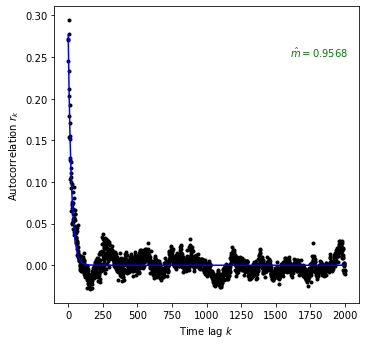

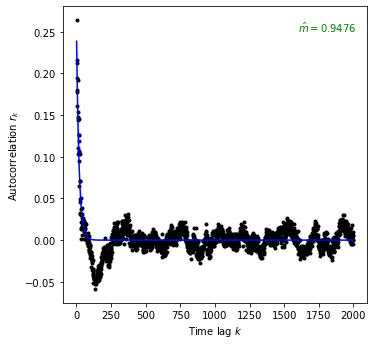

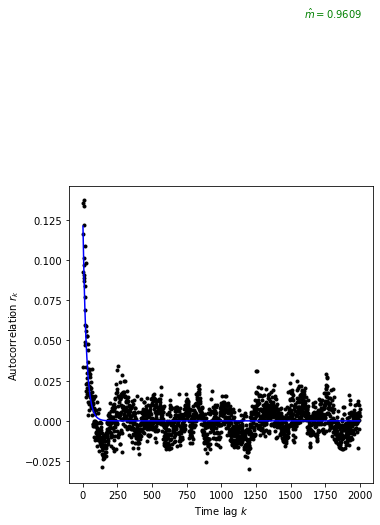

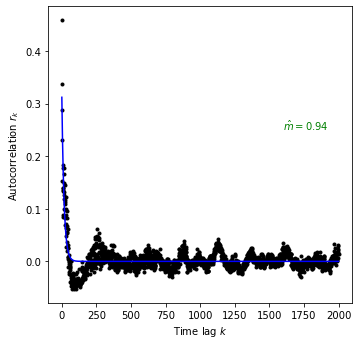

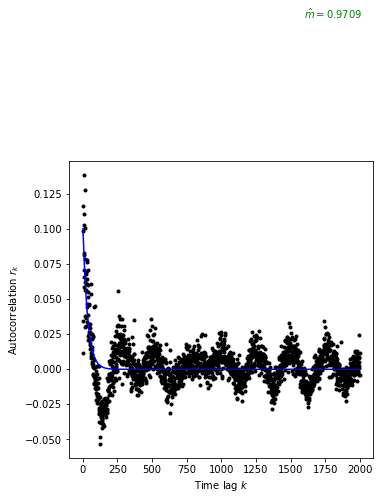

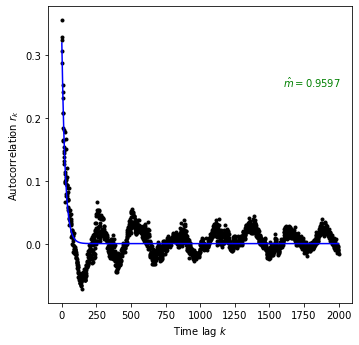

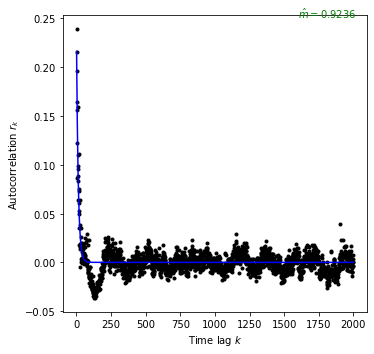

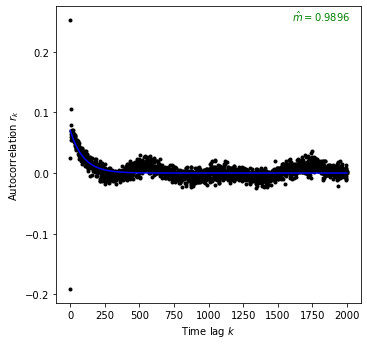

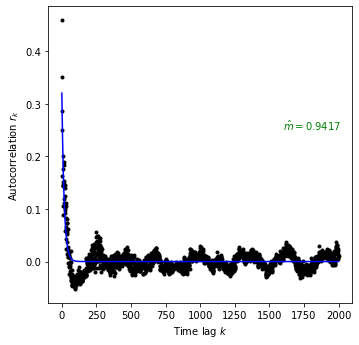

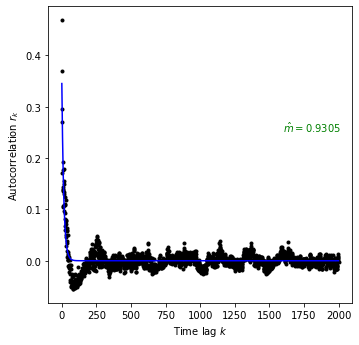

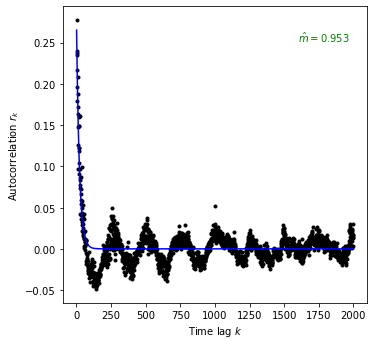

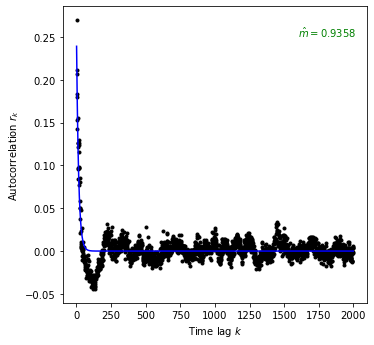

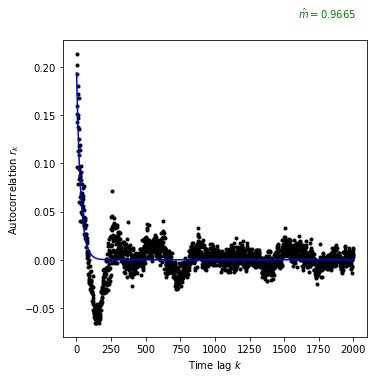

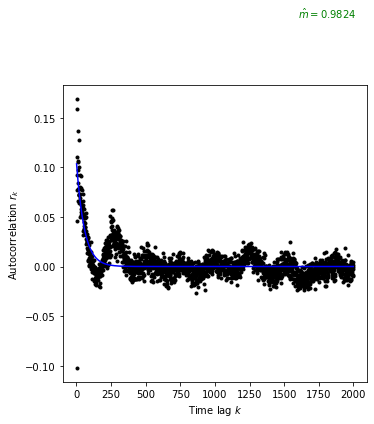

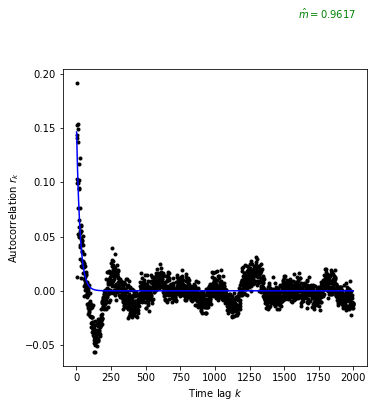

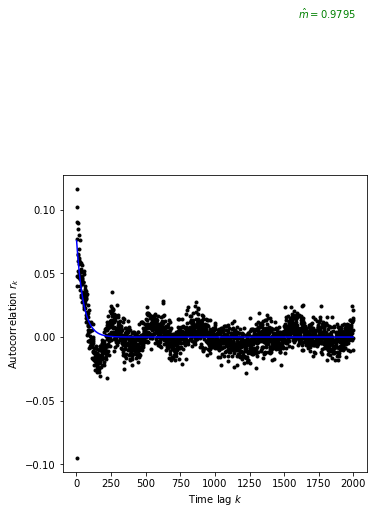

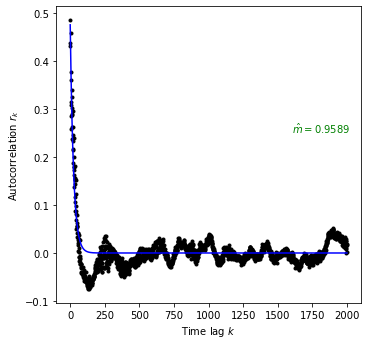

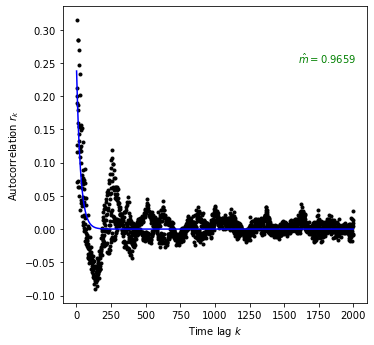

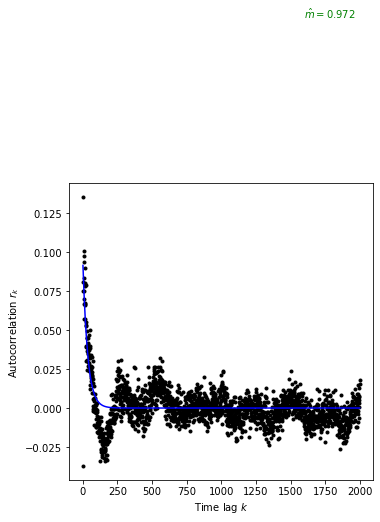

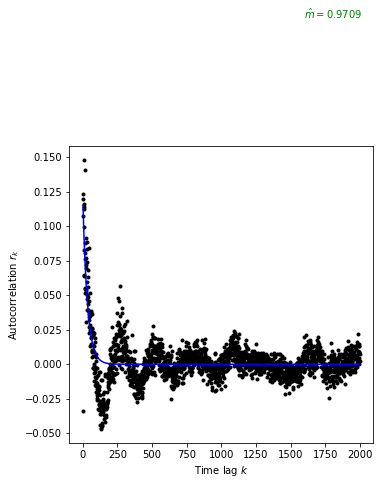

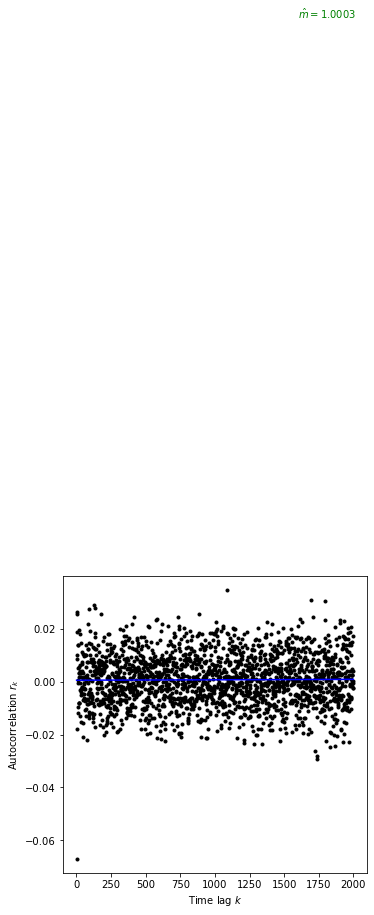

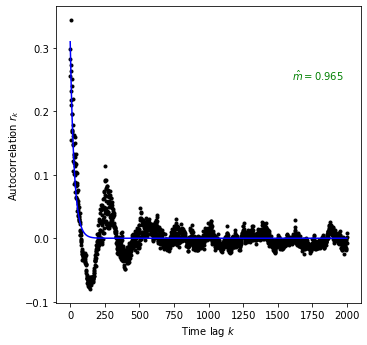

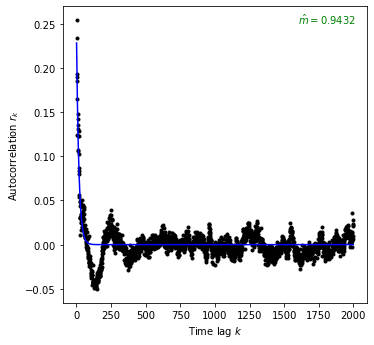

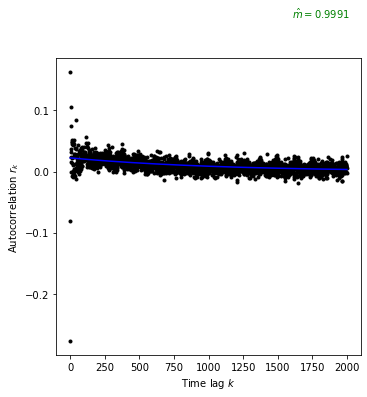

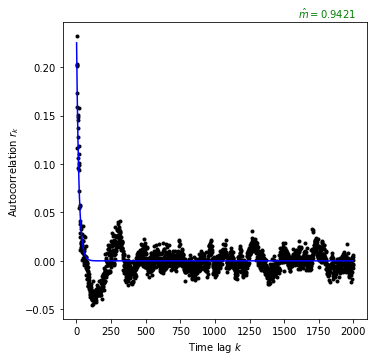

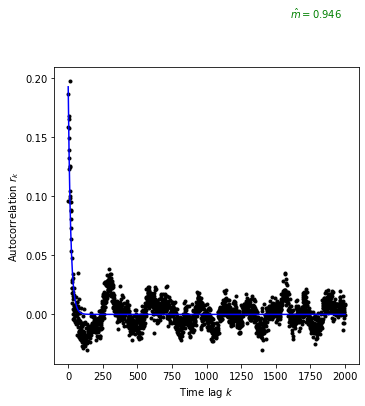

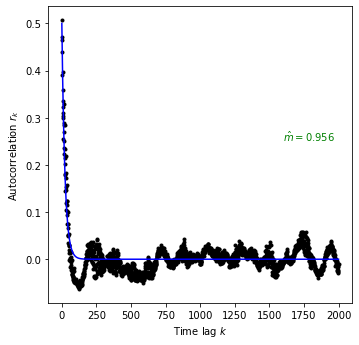

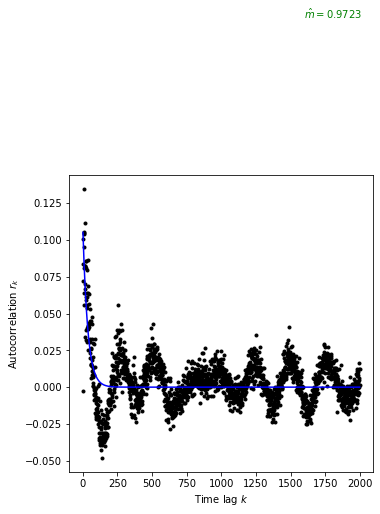

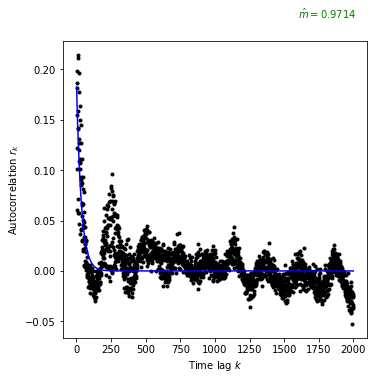

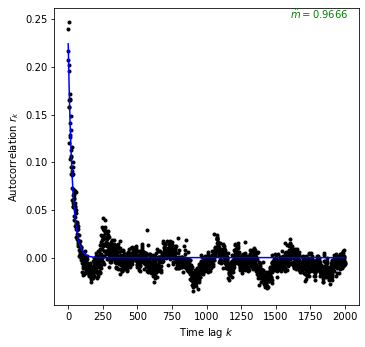

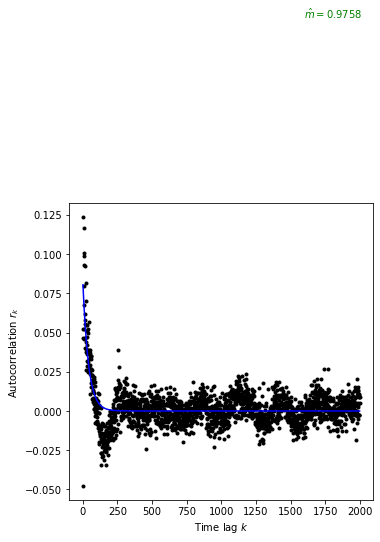

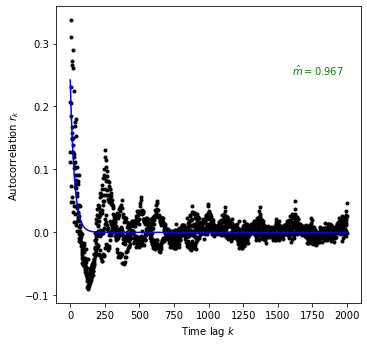

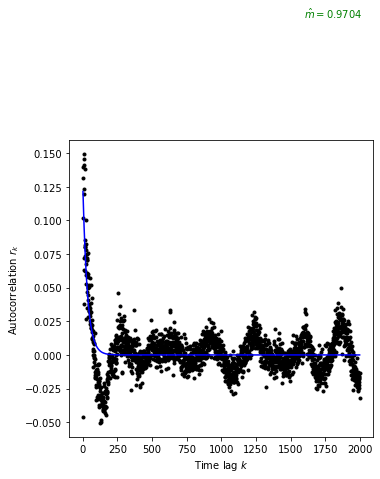

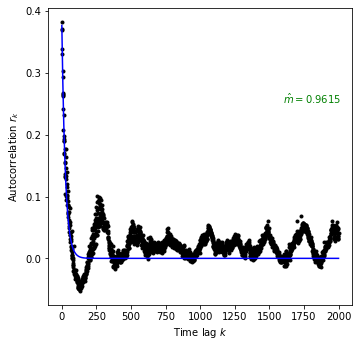

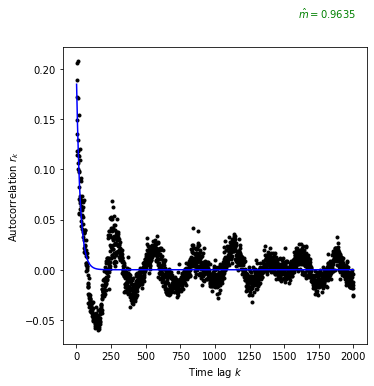

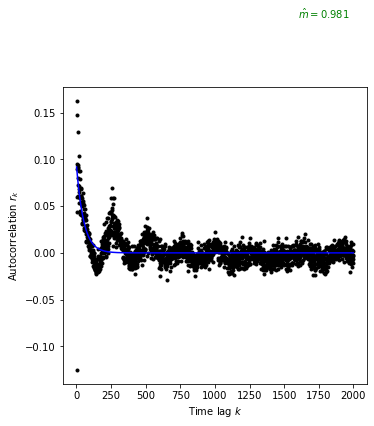

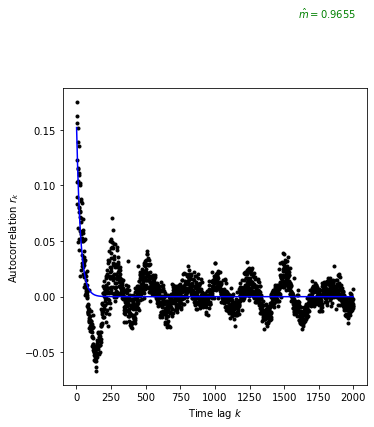

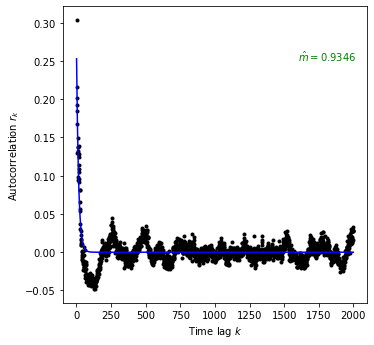

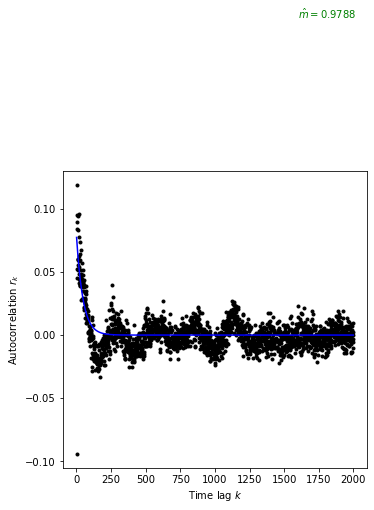

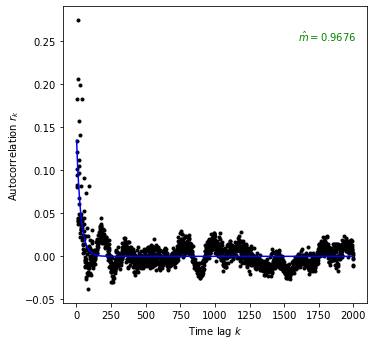

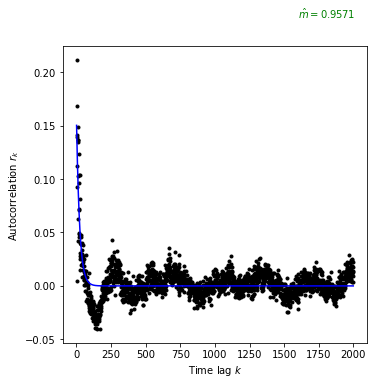

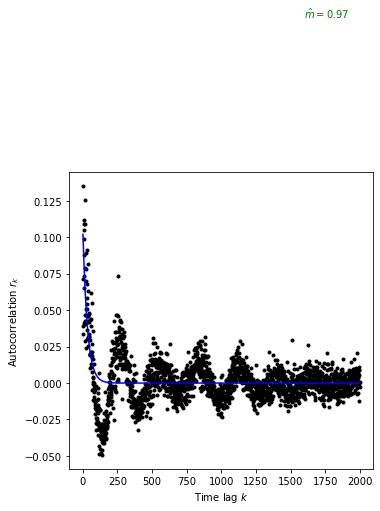

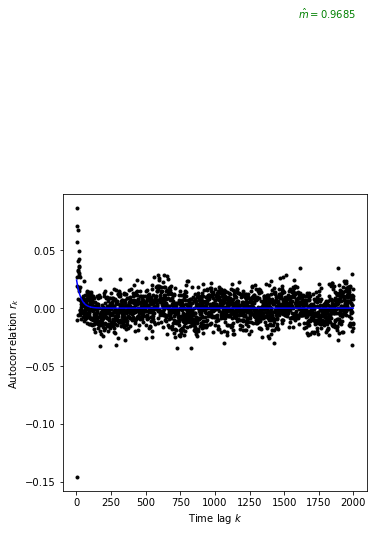

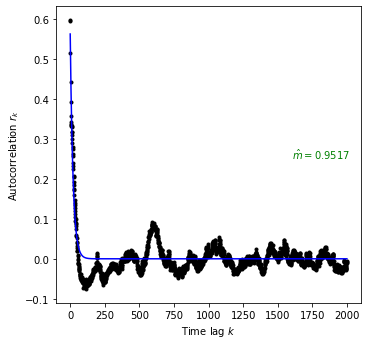

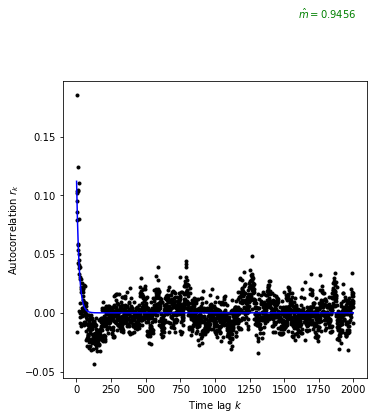

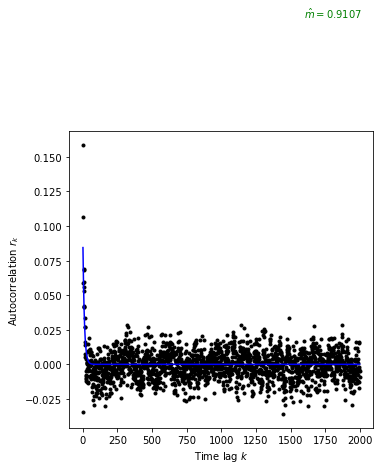

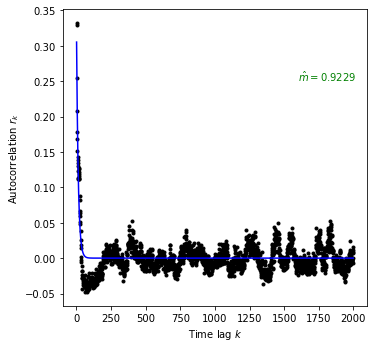

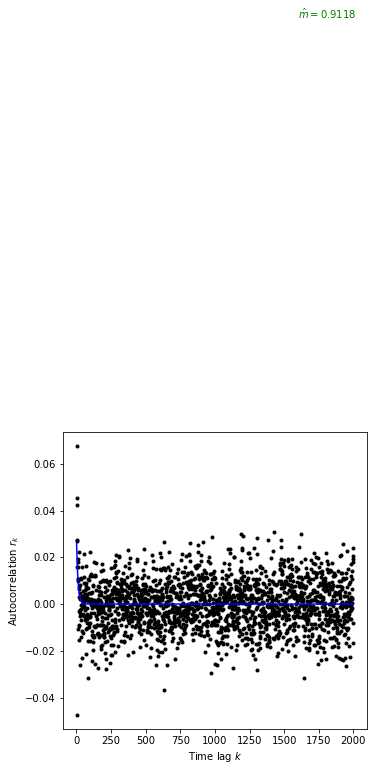

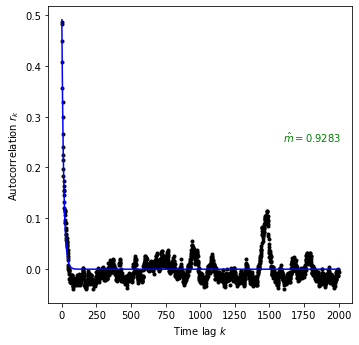

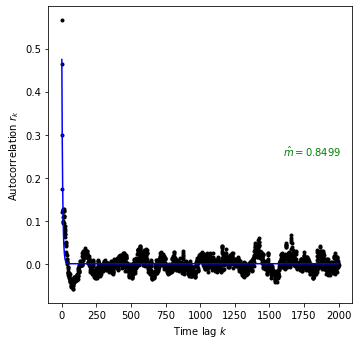

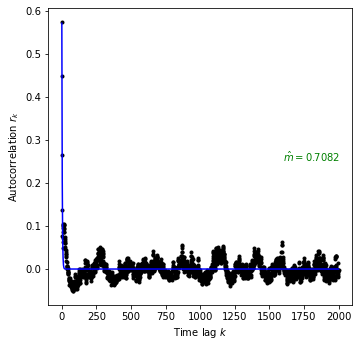

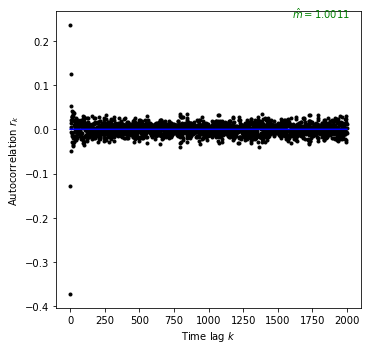

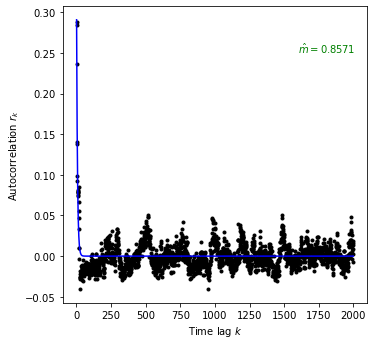

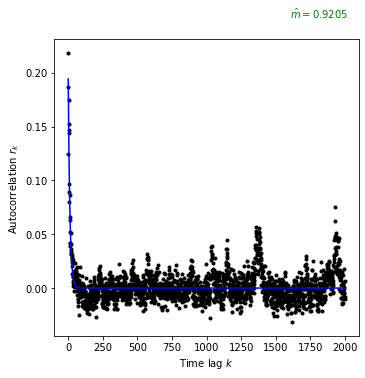

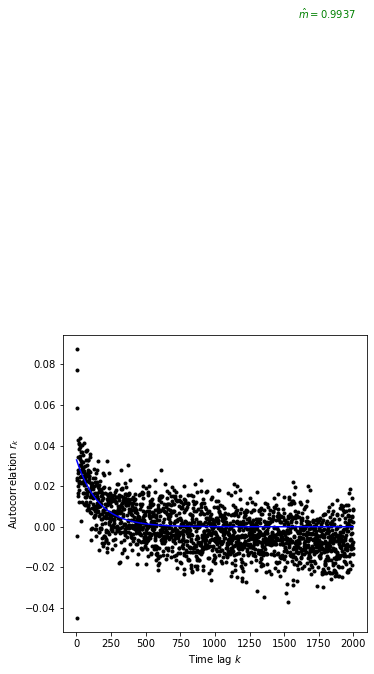

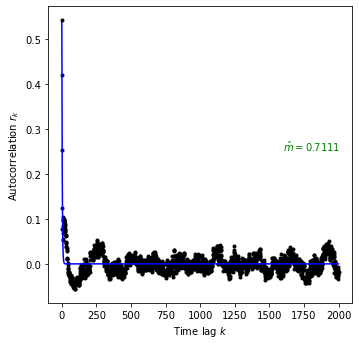

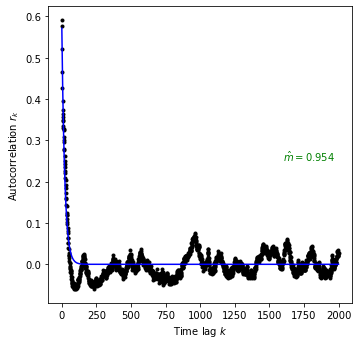

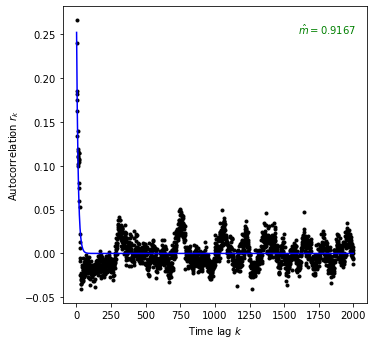

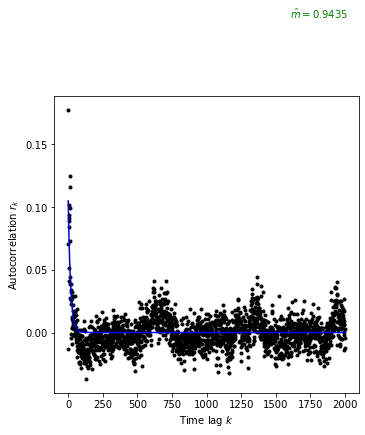

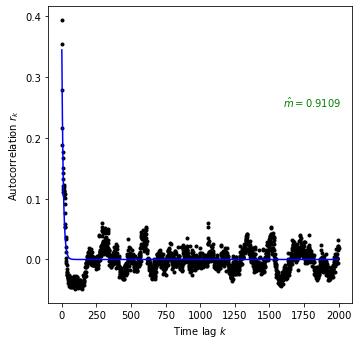

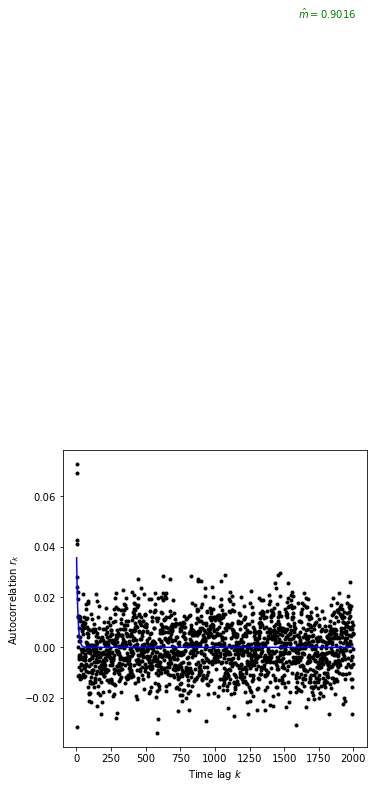

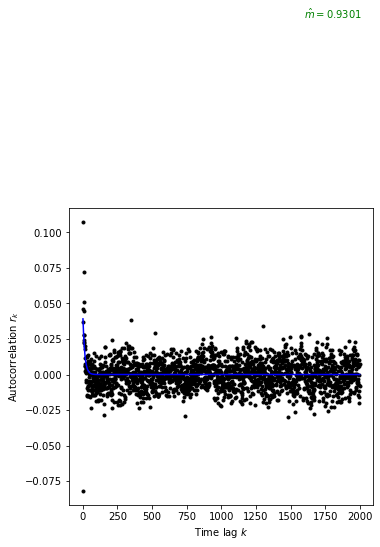

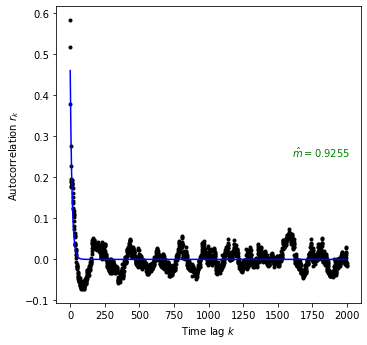

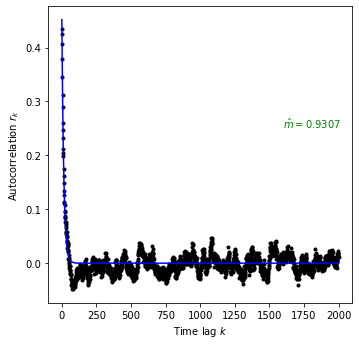

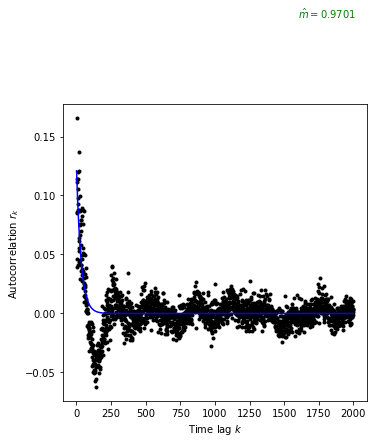

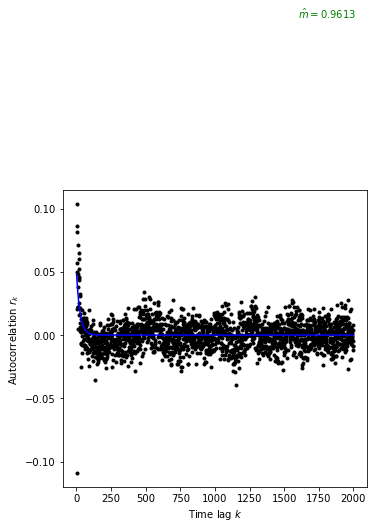

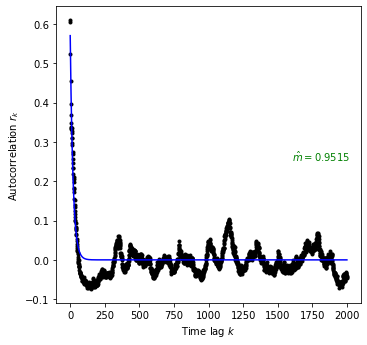

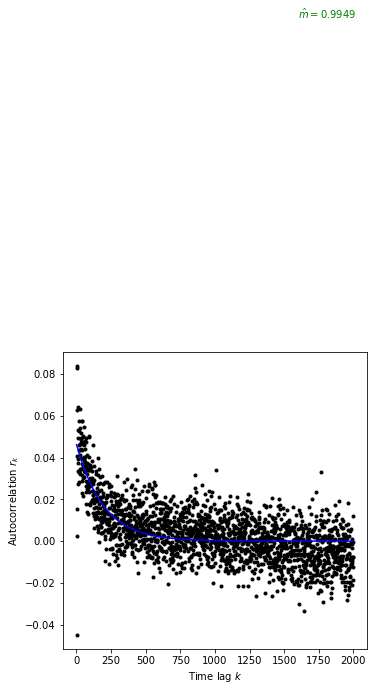

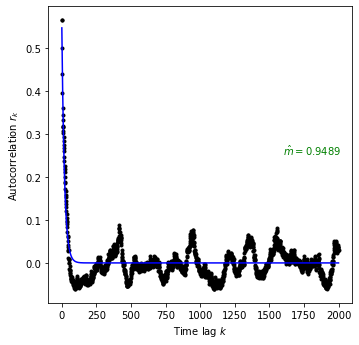

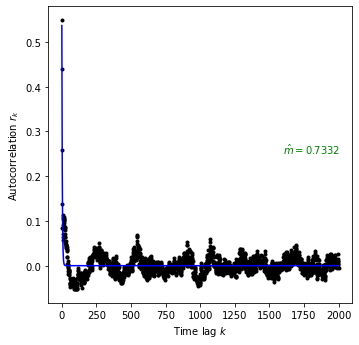

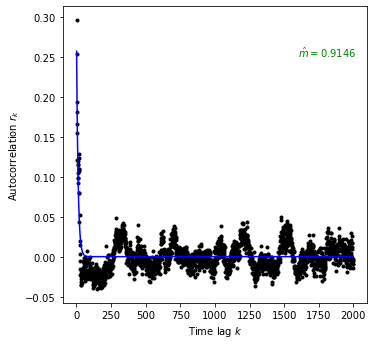

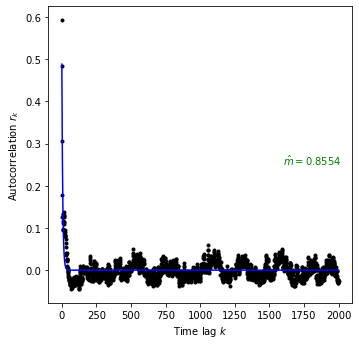

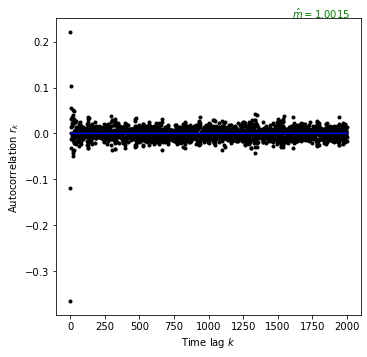

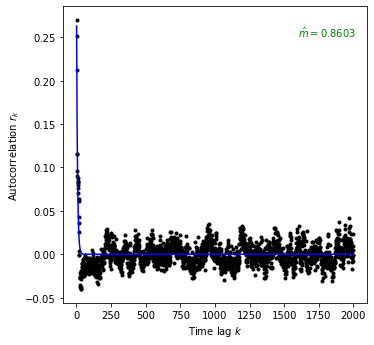

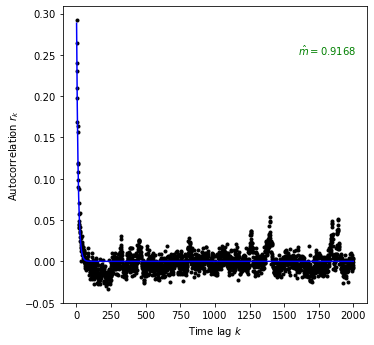

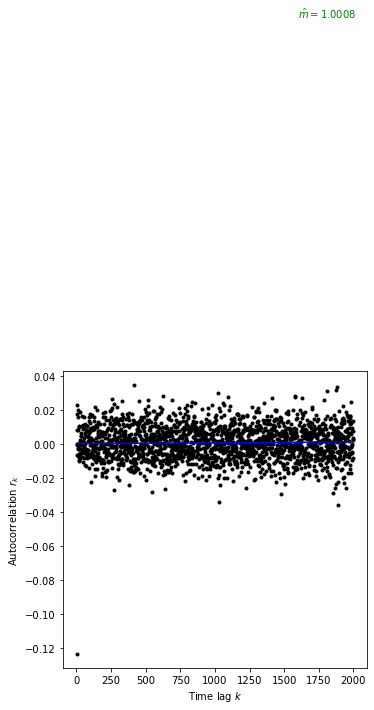

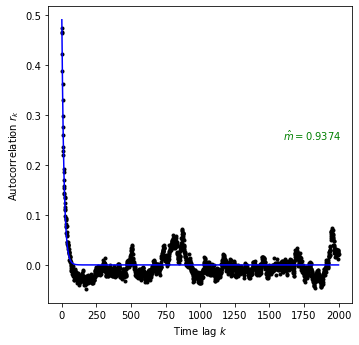

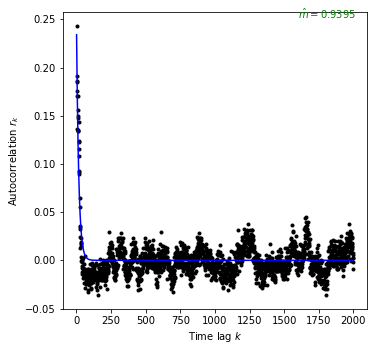

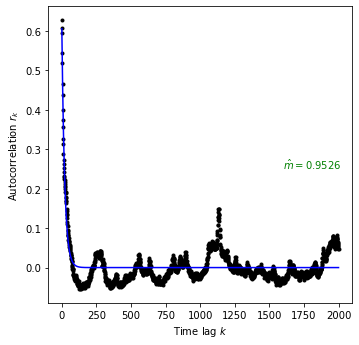

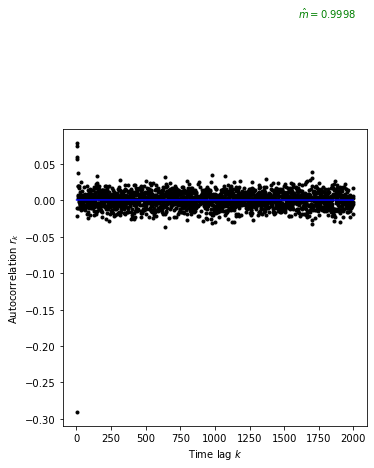

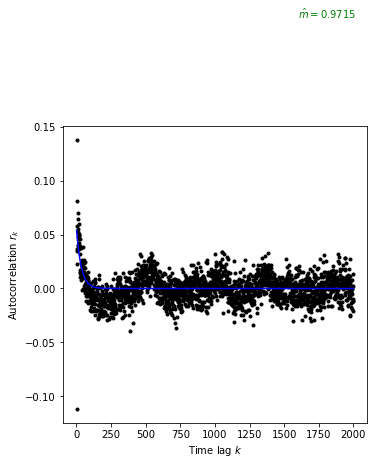

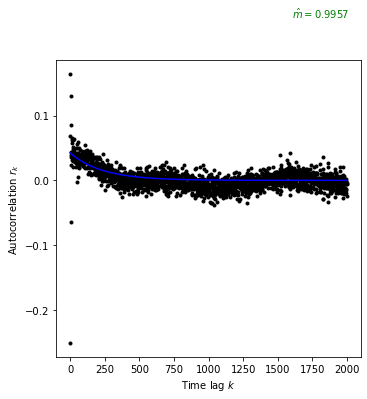

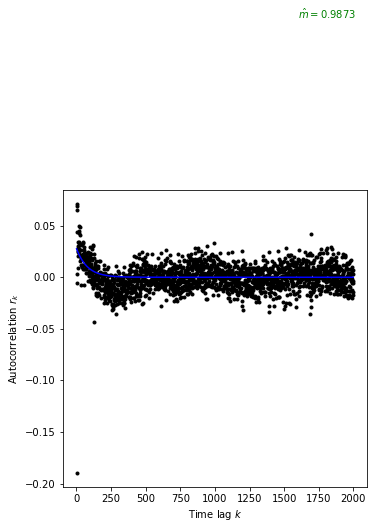

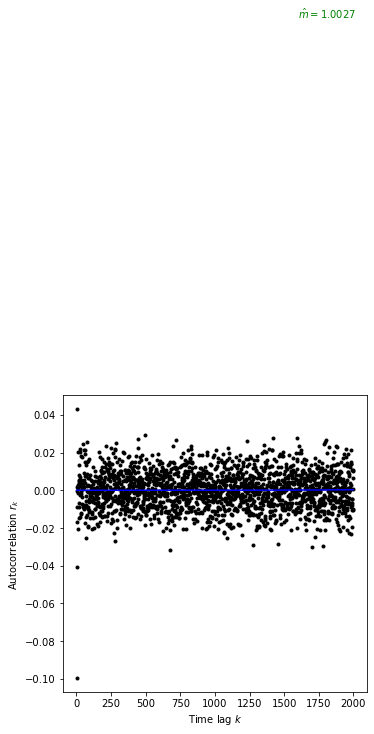

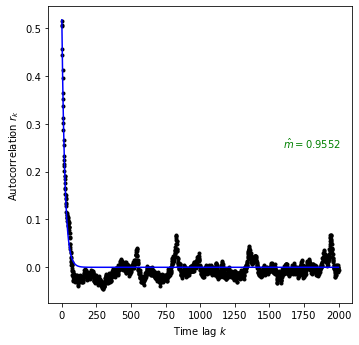

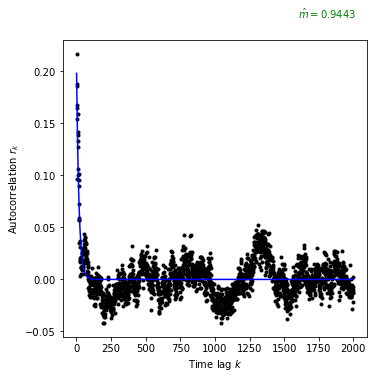

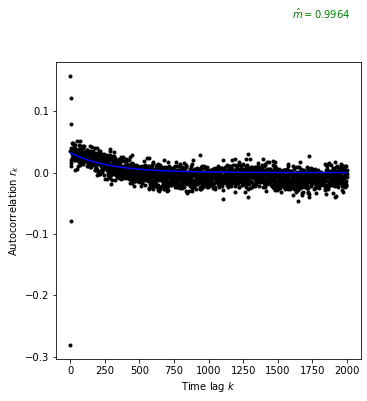

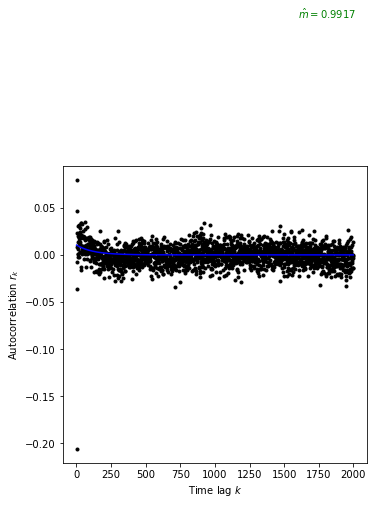

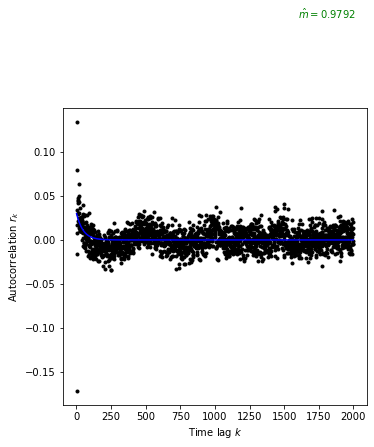

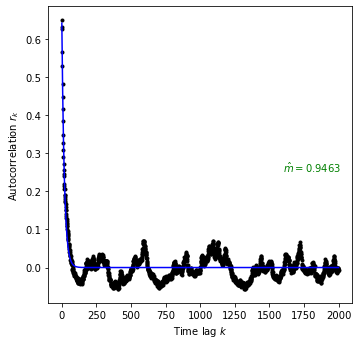

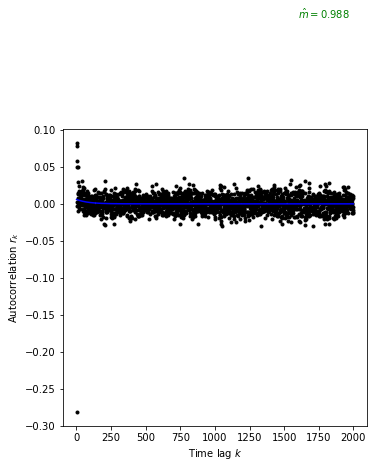

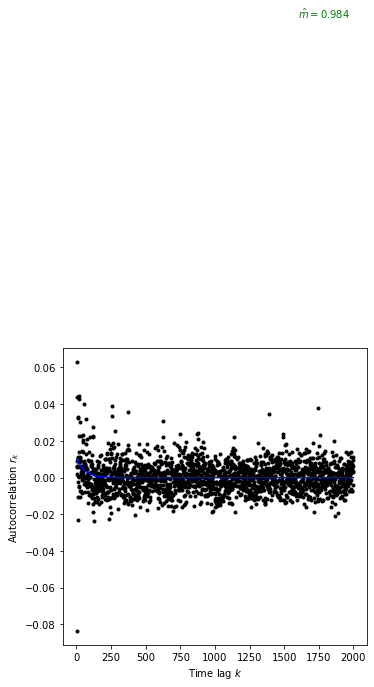

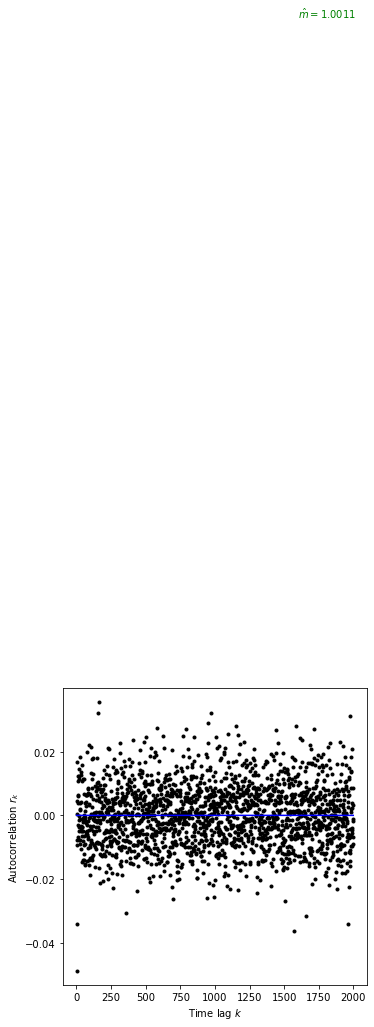

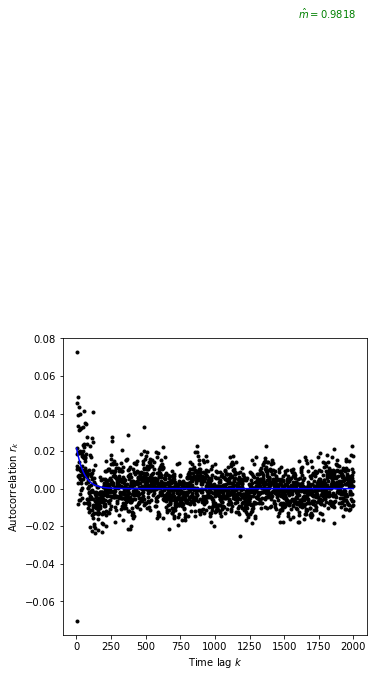

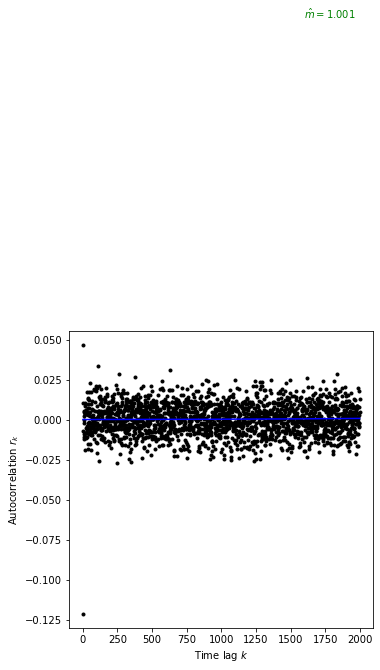

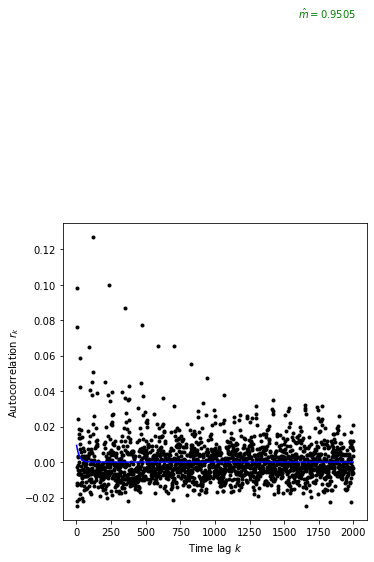

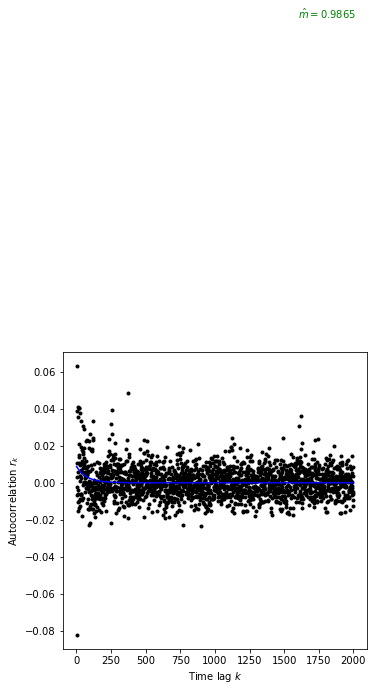

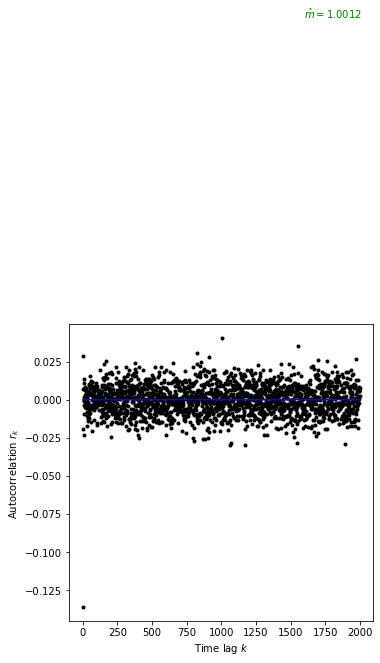

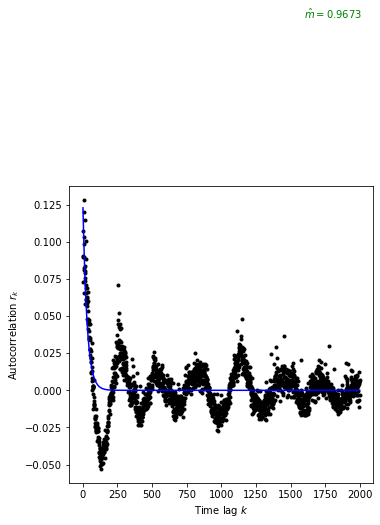

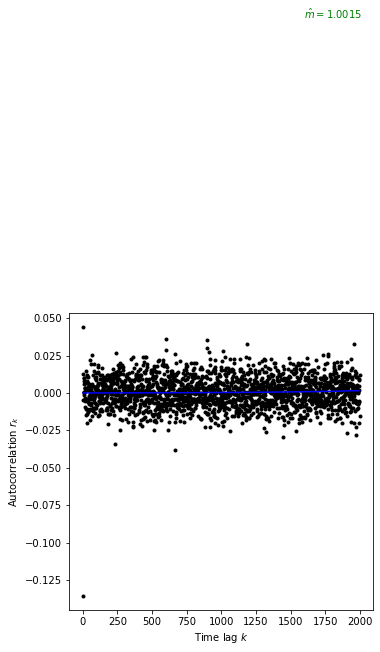

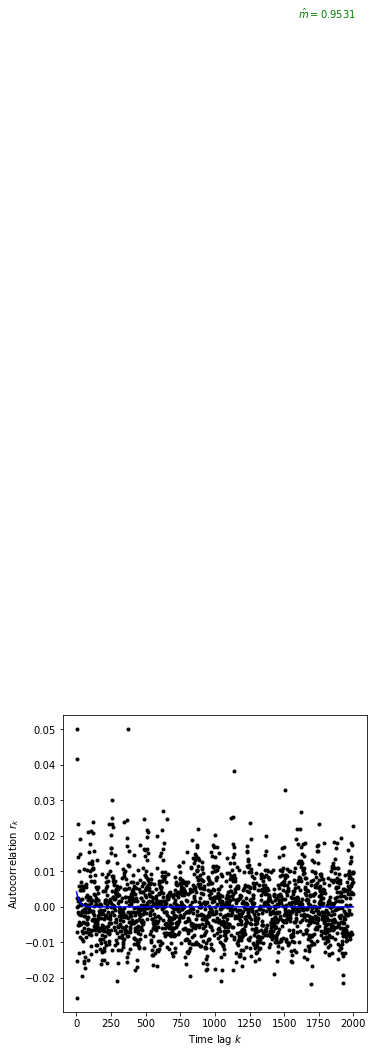

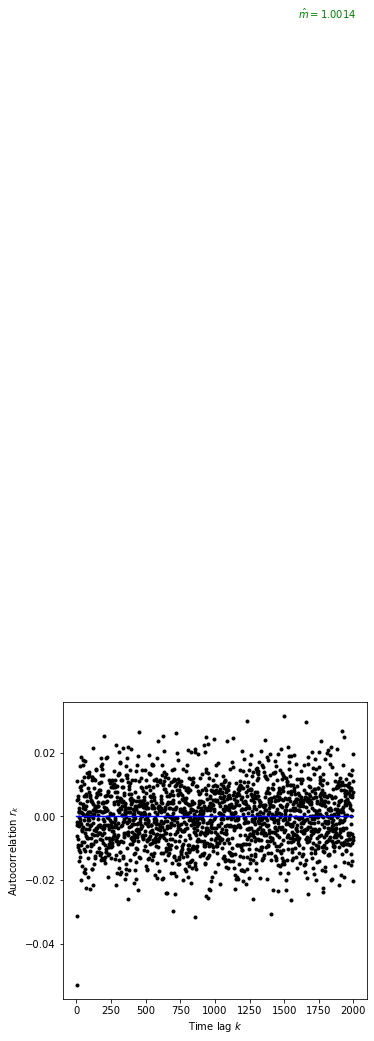

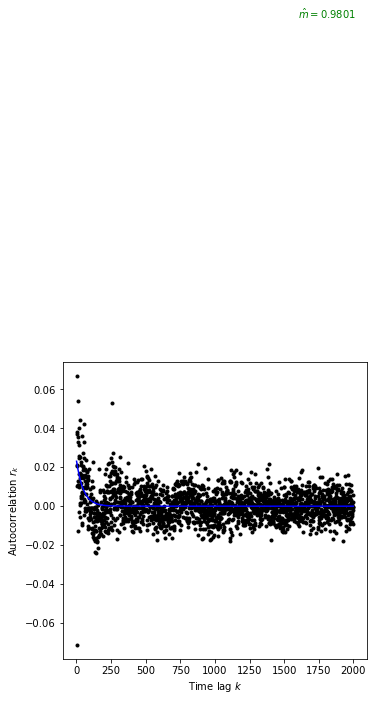

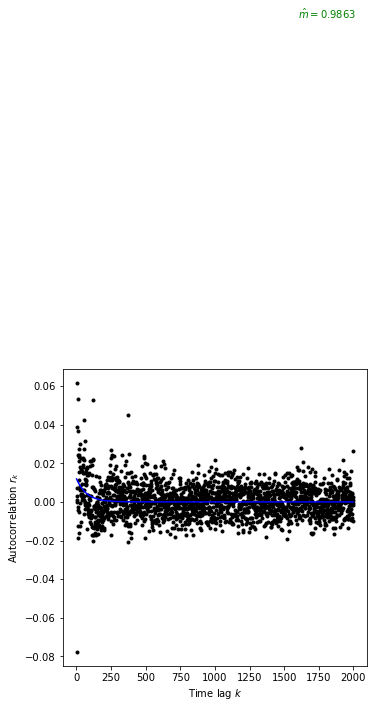

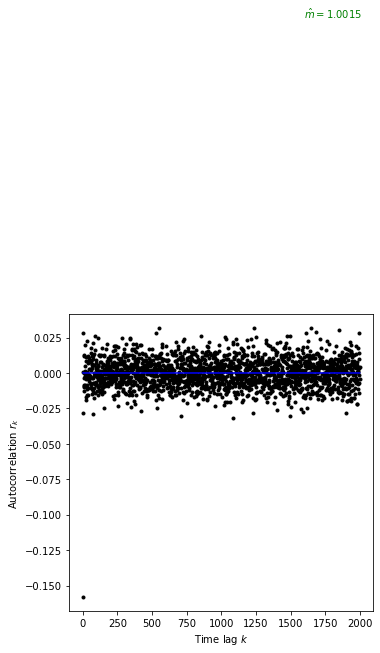

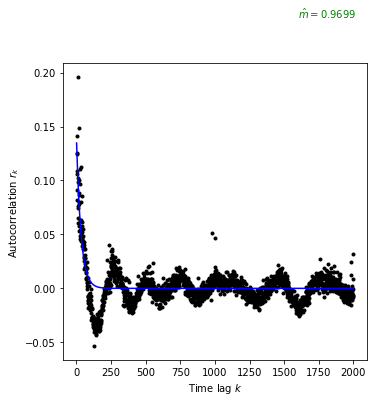

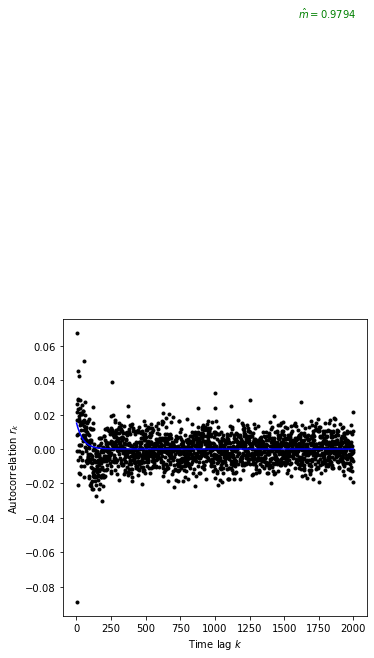

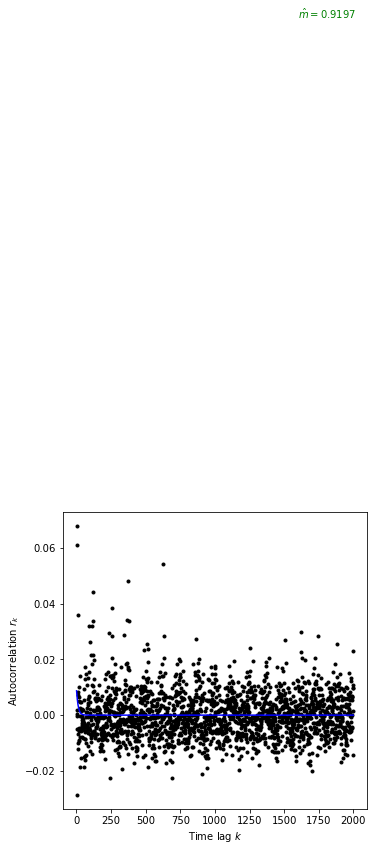

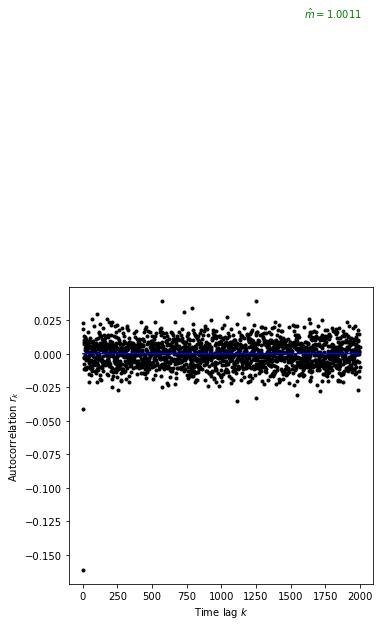

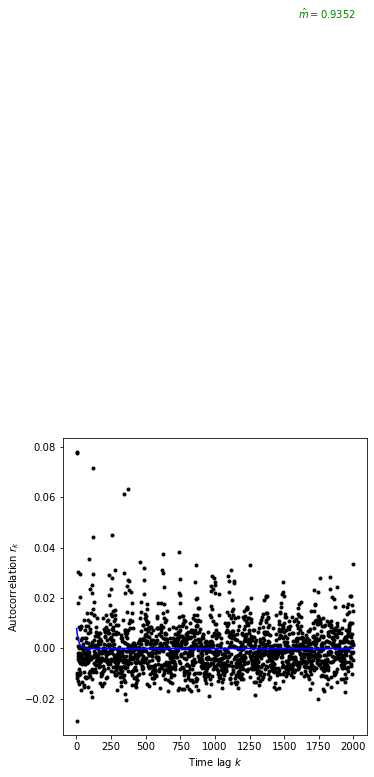

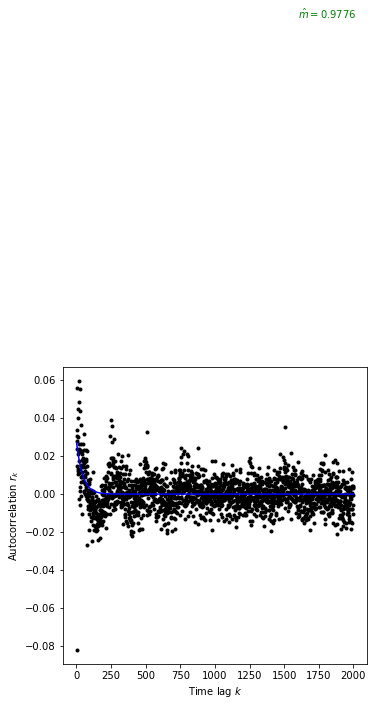

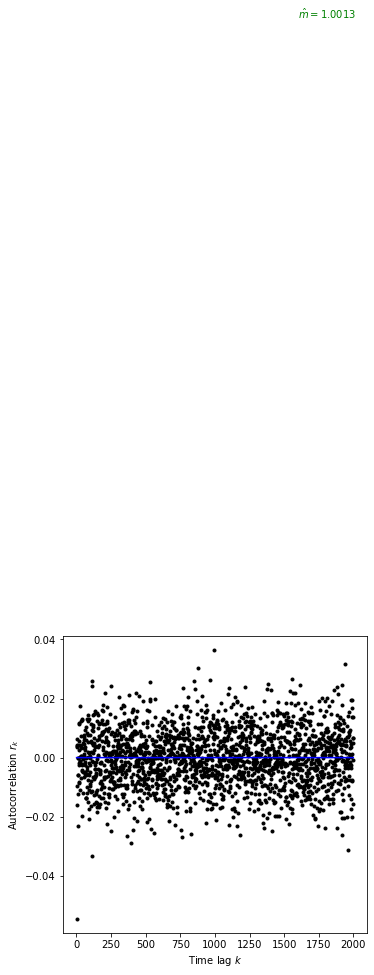

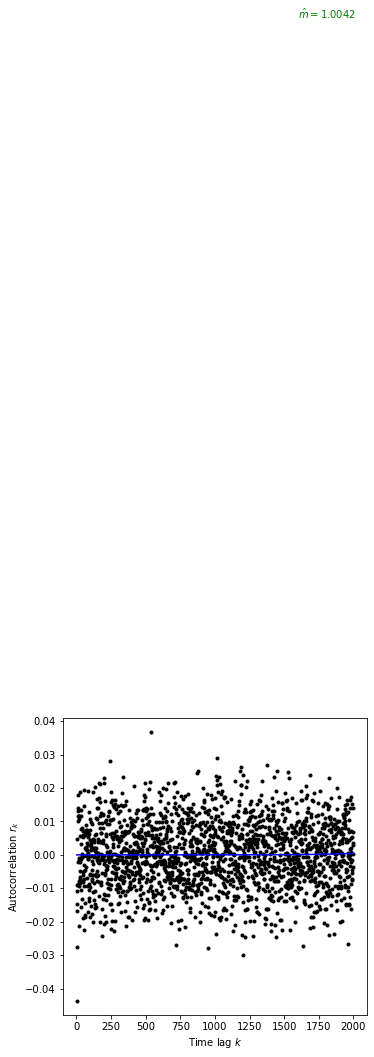

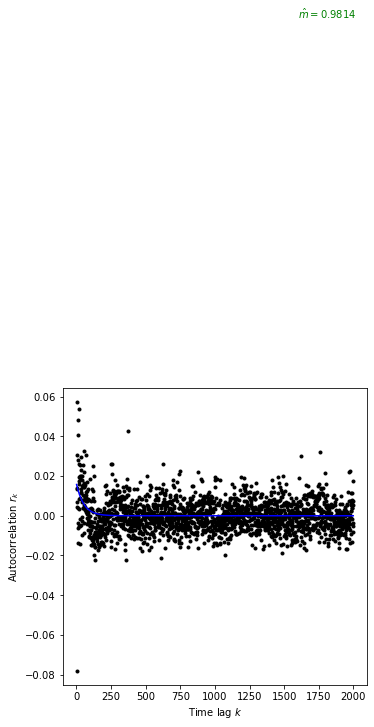

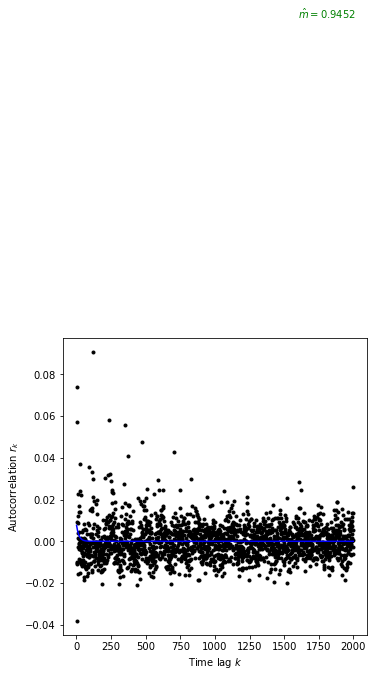

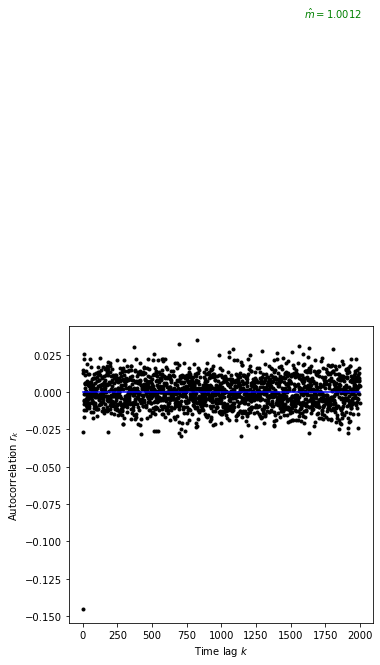

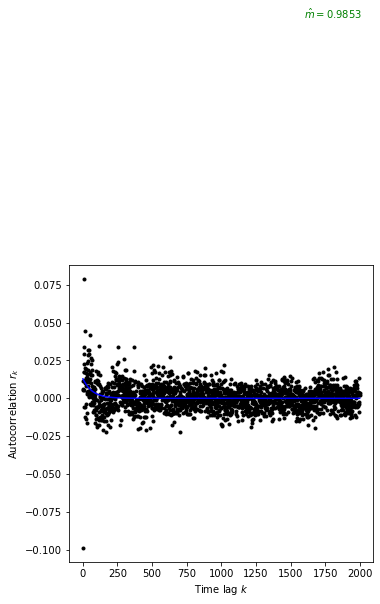

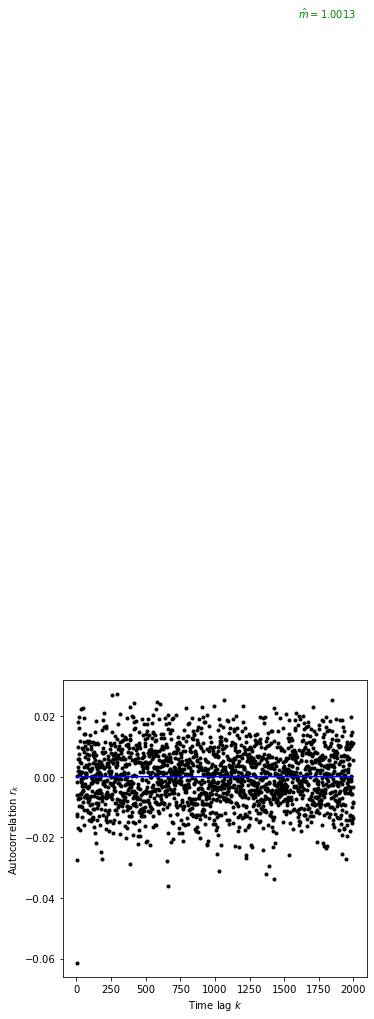

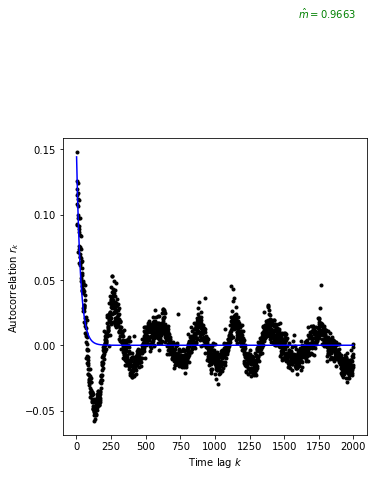

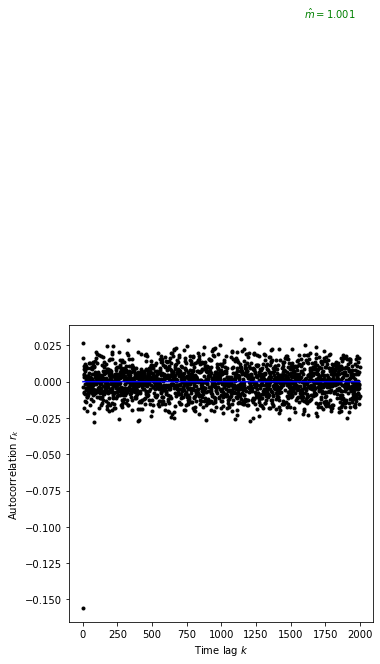

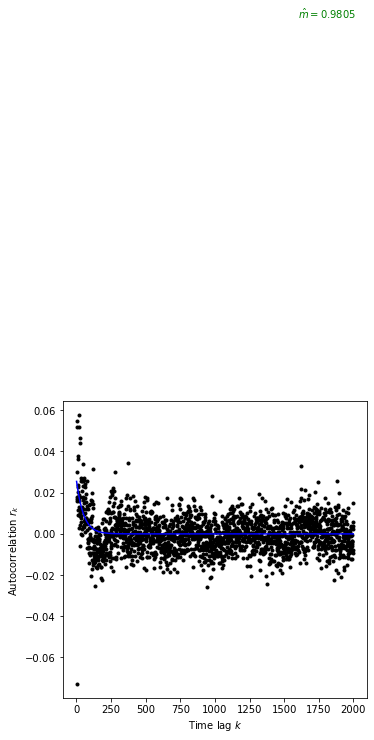

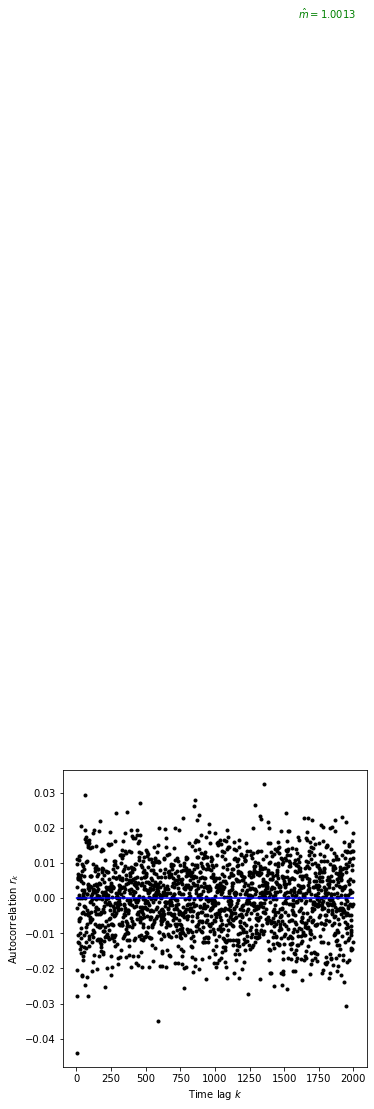

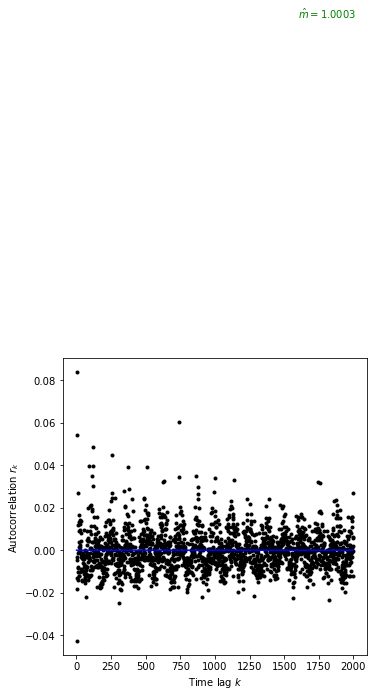

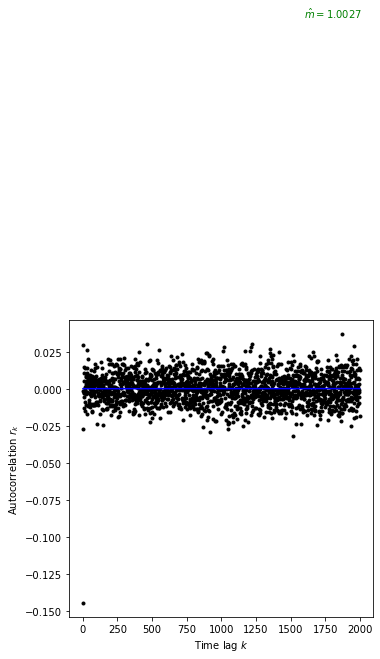

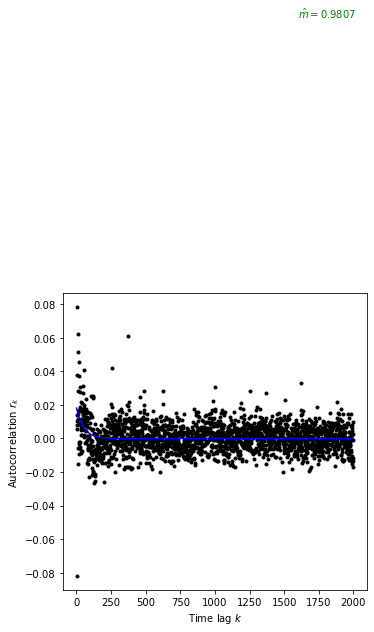

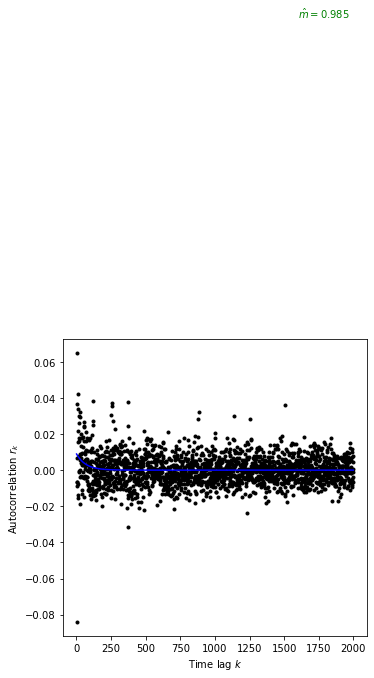

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sys


import WiltingPriesemann as WP
import pylab as plt
import pandas as pd
import pickle

# Define parameters
# All variable names as in Wilting & Priesemann, 2018
# length = 10000
m = 0.98
# activity = 100
k_max = 2000
alpha = 0.01


for dirs in [1,2,3]:
    if dirs ==1:
        dir = '../SpikesAvalanches/CorticalLabs/NewTags_June2021/Active_sessions'
    elif dirs ==2:
        dir = '../SpikesAvalanches/CorticalLabs/NewTags_June2021/Rest_sessions'
    else:
        dir = '../SpikesAvalanches/CorticalLabs/NewTags_June2021/Control(Media Only)_sessions'

    BR_ratio =[]
    chip=[]
    date =[]
    session_num =[]

    import os
    arrays = {}
    df = pd.DataFrame()

    for filename in os.listdir(dir):
        try: 
            if filename.endswith('.npy'):
                arrays[filename] = np.load(os.path.join(dir, filename))
                data = arrays[filename]
    #             print(file.name)
                ## Decided this is the right way to do it:
                ## To compute BRratio on the count of active neurons instead of overall avalnche size in each time bin, uncomment:
                data =np.count_nonzero(data, axis=0).tolist()
                np.set_printoptions(threshold=1000)
                A_t = data
                ## To compute BRratio on the count of active neurons instead of overall avalnche size in each time bin, uncomment:
                A_t = np.asarray(A_t)
                # Emulate subsampling
                a_t = WP.simulate_binomial_subsampling(A_t, alpha)

                # Perform MR estimation
                mr_A = WP.MR_estimation(A_t, k_max)
                mr_a = WP.MR_estimation(a_t, k_max)

                
                # Plot results
                fig = plt.figure(figsize=(12,12))
                # ax1 = fig.add_subplot(221)
                ax2 = fig.add_subplot(222)
                # ax3 = fig.add_subplot(223)
                # ax4 = fig.add_subplot(224)

                # ax1.plot(A_t, '-k')
                # ax1.axhline(y=activity, linestyle=':', color='red')
                # ax1.text(0.5, 1, r'Branching process, $m=' + str(m) + r'$', transform=ax1.transAxes, ha='center', va='top')
                # ax1.set_xlabel(r'Time $t$')
                # ax1.set_ylabel(r'Activity $A_t$')


                ax2.plot(mr_A['k'], mr_A['r_k'], '.k', label=r'Data')
                ax2.plot(mr_A['k'], mr_A['fitfunc'](mr_A['k'], *mr_A['p_opt']), '-b', label=r'MR estimation')
                # ax2.text(3, mr_A['r_k'][0], r'$\hat{m}_\mathrm{C}=' + str(round(mr_A['naive_branching_ratio'],4)) + r'$', ha='left', va='center', color ='r')
                ax2.text(int((k_max / 2) + 2), mr_A['r_k'][int(k_max / 2)], r'$\hat{m}=' + str(round(mr_A['branching_ratio'],4)) + r'$', position = ((k_max-k_max/5),0.25), color='g')
                ax2.set_xlabel(r'Time lag $k$')
                ax2.set_ylabel(r'Autocorrelation $r_k$')


                # ax3.plot(a_t, '-', color='0.4')
                # ax3.axhline(y=activity, linestyle=':', color='red')
                # ax3.text(0.5, 1, r'Subsampled branching process', transform=ax3.transAxes, ha='center', va='top')
                # ax3.set_xlabel(r'Time $t$')
                # ax3.set_ylabel(r'Subsampled activity $a_t$')



                # ax4.plot(mr_a['k'], mr_a['r_k'], '.', color='0.4', label=r'Data')
                # ax4.plot(mr_a['k'], mr_a['fitfunc'](mr_a['k'], *mr_a['p_opt']), '-r', label=r'MR estimation')
                # ax4.text(3, mr_a['r_k'][0], r'$\hat{m}_\mathrm{C}=' + str(mr_a['naive_branching_ratio']) + r'$', ha='left', va='center')
                # ax4.text(int((k_max / 2) + 2), mr_a['r_k'][int(k_max / 2)], r'$\hat{m}=' + str(mr_a['branching_ratio']) + r'$', ha='left', va='center', color='r')
                # ax4.set_xlabel(r'Time lag $\delta t$')
                # ax4.set_ylabel(r'Autocorrelation $r_{\delta t}$')
    #             sys.path.append("../")
    
                if dirs ==1:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_NewTags_June2021/'+'BRratio_ActiveSessions_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
                
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                                    
                elif dirs ==2:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_NewTags_June2021/'+'BRratio_RestSessions_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
                
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                
                else:
                    fig.savefig('../Results/Criticality_BulkRun_BRratio/BR_NewTags_June2021/'+'BRratio_ControlSessions_'+ os.path.splitext(os.path.splitext(filename)[0])[0]+'.pdf', bbox_inches='tight')
         
                    BR_ratio.append(round(mr_A['branching_ratio'],4))
                    chip.append(filename.split('.')[0])
                    date.append(filename.split('.')[1])
                    session_num.append(filename.split('.')[2])
                  
                plt.show()

        except:
            pass
        
    df['chip_id'] = chip
    df['session_num'] =session_num
    df['date'] =date
    df['branching_ratio'] = BR_ratio  
    
    if dirs ==1:
        df.to_pickle('../Results/Result DataFrames/NewTags_June2021/BRratio_act')
    if dirs ==2:
        df.to_pickle('../Results/Result DataFrames/NewTags_June2021/BRratio_rest')
    if dirs ==3:
        df.to_pickle('../Results/Result DataFrames/NewTags_June2021/BRratio_ctl')






## Average of BRratio for diff data types

In [48]:
from collections import defaultdict
from pathlib import Path
import argparse

import numpy
import pandas as pd
import os
import pickle


import sys


In [49]:
df_BR_control = pd.read_pickle('../Results/Result DataFrames/NewTags_June2021/BRratio_ctl')
df_BR_rest = pd.read_pickle('../Results/Result DataFrames/NewTags_June2021/BRratio_rest')
df_BR_active = pd.read_pickle('../Results/Result DataFrames/NewTags_June2021/BRratio_act')


In [50]:
BR_control_mean = np.mean(df_BR_control['branching_ratio'])
BR_control_std= np.std(df_BR_control['branching_ratio'])
print('number of control sessions valid for BRratio calc is:')
print(len(df_BR_control))
print('Control BR mean is')
print(BR_control_mean)
print('Control BR std is')
print(BR_control_std)

number of control sessions valid for BRratio calc is:
35
Control BR mean is
0.9833685714285715
Control BR std is
0.021107084408911108


In [51]:
BR_rest_mean = np.mean(df_BR_rest['branching_ratio'])
BR_rest_std= np.std(df_BR_rest['branching_ratio'])
print('number of rest sessions valid for BRratio calc is:')
print(len(df_BR_rest))
print('Rest BR mean is')
print(BR_rest_mean)
print('Rest BR std is')
print(BR_rest_std)

number of rest sessions valid for BRratio calc is:
50
Rest BR mean is
0.9332199999999997
Rest BR std is
0.06734362330614534


In [53]:
# Get indexes where name column has value john and 
# value column equals to 0.0
# indexNames = df_BR_active[(df_BR_active['branching_ratio']<0.85)].index
# # Delete these row indexes from 
# df_BR_active.drop(indexNames , inplace=True)


BR_active_mean = np.mean(df_BR_active['branching_ratio'])
BR_active_std= np.std(df_BR_active['branching_ratio'])
print('number of active sessions valid for BRratio calc is:')
print(len(df_BR_active))
print('Active BR mean is')
print(BR_active_mean)
print('Active BR std is')
print(BR_active_std)

number of active sessions valid for BRratio calc is:
76
Active BR mean is
0.9605526315789477
Active BR std is
0.01841562175582839
